<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Load the basic libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 2. Load the dataset
df = pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# 3. Analyze the dataset
print(f"Dataset Shape: {df.shape}")
print("Dataset Description:\n", df.describe())

Dataset Shape: (768, 9)
Dataset Description:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    

In [6]:
# 4. Normalize the data (only features, not target)
def feature_normalization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

In [7]:
# Select features for normalization
X_in = df.iloc[:, :-1].values  # Exclude the 'Outcome' column (target)
X_normalized, mean_X, std_X = feature_normalization(X_in)
X_normalized[:5]  # Check first 5 rows of normalized features

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [8]:
# 5. Pre-process the data
# The target variable 'Outcome' remains as is
y = df['Outcome'].values

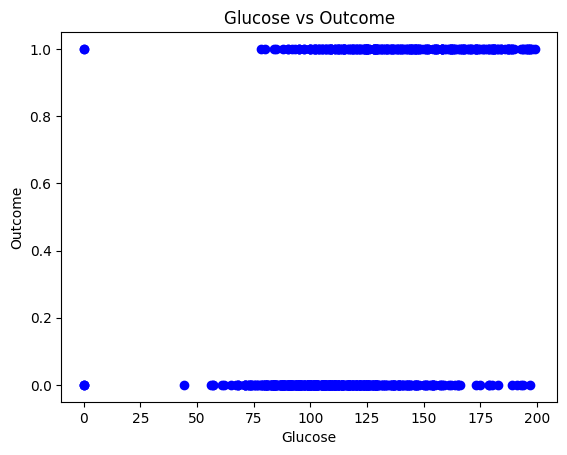

In [9]:
# 6. Visualize the Data

plt.scatter(df['Glucose'], df['Outcome'], color='blue')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Glucose vs Outcome')
plt.show()

In [31]:
# 8. Write the Hypothesis Function
def hypothesis(theta_array, X):
    # Use all the elements of theta_array, including the intercept term (theta_0)
    return np.dot(X, theta_array)

In [34]:
# 9. Write the Cost Function
def cost_function(theta_array, X, y, m):
    total_cost = np.sum((hypothesis(theta_array, X) - y) ** 2)
    return total_cost / (2 * m)

In [32]:
# 10. Write the Gradient Descent optimization algorithm
def gradient_descent(theta_array, X, y, m, alpha):
    # Calculate the error (predictions - actual values)
    error = hypothesis(theta_array, X) - y

    # Calculate gradients
    gradient = np.dot(X.T, error) / m  # X.T is the transpose of X

    # Update parameters using gradient descent
    theta_array -= alpha * gradient

    return theta_array

In [33]:
# 11. Apply the training over the dataset to minimize the loss
def training(X, y, alpha, epochs):
    m = len(y)

    # Add a column of ones to X for the intercept term (theta_0)
    X_with_intercept = np.c_[np.ones(m), X]

    # Initialize theta values (including intercept)
    theta_array = np.zeros(X_with_intercept.shape[1])  # Now it has 9 parameters (1 for intercept + 8 for features)

    cost_values = []

    for i in range(epochs):
        theta_array = gradient_descent(theta_array, X_with_intercept, y, m, alpha)
        loss = cost_function(theta_array, X_with_intercept, y, m)
        cost_values.append(loss)

        if i % (epochs // 10) == 0 or i == epochs - 1:
            print(f"Epoch {i} | Cost: {loss}")

    # Plot cost function vs iterations (Learning Curve)
    plt.plot(range(epochs), cost_values, label='Cost Function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Epochs (Learning Curve)')
    plt.legend()
    plt.show()

    return theta_array

Epoch 0 | Cost: 0.1722171772537491
Epoch 50 | Cost: 0.10974993844276004
Epoch 100 | Cost: 0.09041671094053845
Epoch 150 | Cost: 0.08356356071918968
Epoch 200 | Cost: 0.08095985308309786
Epoch 250 | Cost: 0.07992633379169946
Epoch 300 | Cost: 0.07949963077453698
Epoch 350 | Cost: 0.07931564661542749
Epoch 400 | Cost: 0.0792322613107495
Epoch 450 | Cost: 0.0791923268385239
Epoch 499 | Cost: 0.07917237134912793


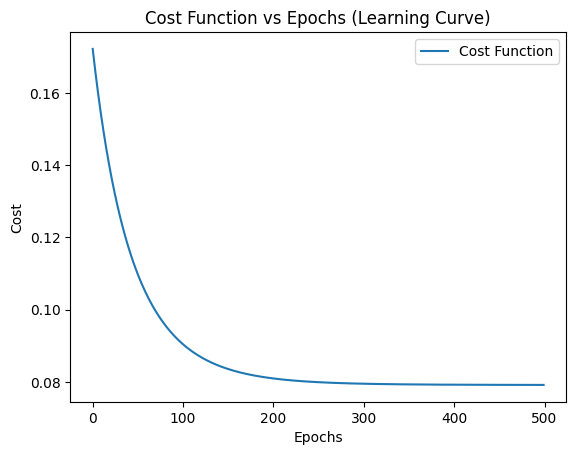

Final Theta values: [ 0.34666551  0.06644021  0.18366796 -0.04315793 -0.00053357 -0.0150901
  0.10396258  0.04868087  0.03515219]


In [35]:
# 12. Find the best fit line to the given dataset
alpha = 0.01
epochs = 500
theta_array = training(X_normalized, y, alpha, epochs)

# Print the final parameters (theta values)
print(f"Final Theta values: {theta_array}")

In [37]:
# 13. Observe the cost function vs iterations learning curve
def training(X, y, alpha, epochs):
    m = len(y)
    theta_array = np.zeros(X.shape[1] + 1)  # Initialize theta (including theta_0)
    X_with_intercept = np.c_[np.ones(m), X]  # Add a column of ones for intercept term (theta_0)
    cost_values = []

    for i in range(epochs):
        theta_array = gradient_descent(theta_array, X_with_intercept, y, m, alpha)
        loss = cost_function(theta_array, X_with_intercept, y, m)
        cost_values.append(loss)

        if i % (epochs // 10) == 0 or i == epochs - 1:
            print(f"Epoch {i} | Cost: {loss}")

    # Plot cost function vs iterations (Learning Curve)
    plt.plot(range(epochs), cost_values, label='Cost Function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Epochs (Learning Curve)')
    plt.legend()
    plt.show()

    return theta_array
